# [CP-113A] Analyzing the CPS ASEC 


---


### Professors: Sara Hinkey

Welcome to Analyzing the CPS ASEC! In this lab, we will introduce you to Jupyter Notebooks and the tools that you are going to use to conduct your data analysis of the Annual Social and Economic Supplement (ASEC) of the Current Population Survey (CPS). In the main part of this notebook, you will work with the CPS ASEC dataset using this Jupyter Notebook and learn how to read tabular datasets, interpret data visualizations, and compare various economic indicators. By the end of this notebook, you will also apply your knowledge to answer a set of short answer questions. 

Estimated Time: ______

---


## Table of Contents (TBD, will be updated later)

1. 

---


## Today's lab (TBD, will be updated later)


1. Navigate the Jupyter Notebook 




# Part 1: The Jupyter Notebook <a id='section 0'></a>

Before we start our lab, we want to give a brief introduction to Jupyter Notebooks (like this one) where you will work on conducting your survey analysis. 

**Jupyter notebooks** are documents that can contain a seamless compilation of text, code, visualizations, and more. A notebook is composed of two types of rectangular **cells**:  markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code. All of the code in this notebook is in a programming language called **Python**. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys or by simply scrolling.

### 1.1 Run a cell <a id='subsection 0a'></a>
To run a code cell once it's been selected, 
- press `Shift` + `Enter`, or
- click the Run button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number corresponding to the order in which the cell was run will replace the asterisk and any output from the code will appear under the cell.

### 1.2 Editing a cell <a id='subsection 0c'></a>

**Question 1.2.1** You can edit a Markdown cell by clicking it twice. Text in Markdown cells is written in [**Markdown**](https://daringfireball.net/projects/markdown/), a formatting syntax for plain text, so you may see some funky symbols when you edit a text cell. Once you've made your changes, you can exit text editing mode by running the cell. Edit the next cell to fix the misspelling.

This is an analysis of economic survy data.

### 1.3 Saving and loading <a id='subsection 0d'></a>

#### Saving and Loading

Your notebook can record all of your text and code edits, as well as any graphs you generate or calculations you make. You can save the notebook in its current state by clicking `Control-S`/`Command-S`, clicking the **floppy disc icon** in the toolbar at the top of the page, or by navigating to **File > Save and Checkpoint** in the menu bar.

The next time you open the notebook, it will look the same as when you last saved it.

**Note:** After loading a notebook you will see all the outputs (graphs, computations, etc) from your last session, but you won't be able to use any variables you assigned or functions you defined. You can get the functions and variables back by re-running the cells where they were defined – the easiest way is to **highlight the cell where you left off work, then go to Cell > Run all above** in the menu bar. You can also use this menu to run all cells in the notebook by clicking **Run all**.

**Please run the cell below to load the modules we will be using throughout this notebook.**

In [3]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Part 2: Understanding the Dataset

In today's lab, we will be analyzing data from the ASEC CPS, or the Annual Social and Economic Supplement of the Current Population Survey. In short, this is a source of official estimates of of poverty levels and rates and of widely used measures of income. In this part of the lab, we will get familiar with how to read tabular data and answer questions using statistical analysis. 

*First, run the cell below to get an idea of what our dataset looks like*

In [4]:
asec_cps = Table().read_table('fulldata.csv')
asec_cps.show(2)

Year,Household Weight,State,County,City,Ownership Status,Household Income,Foodstamp Recipient,Age,Race,Hispanic,Education Status,Employment Status,Part of Labor Force,Occupation,Industry,Type of Worker,Employment Sector,Hours worked per week,Personal Pre-Tax Income,Pre-Tax Income,Pre-Tax Wages,Poverty Status
2007,266,California,"El Centro, CA",Not in identifiable city (or size group),Rented,15000,No,32,White,Hispanic,No HS,Employed,"Yes, in the labor force","Farming, Fishing","Agriculture, Hunting, Forestry",Works for wages,non-profit,40,15000,15000,15000,Near Poverty
2007,67,California,Not in identifiable area,Not in identifiable city (or size group),Owned or being bought (loan),72000,No,52,White,Not hispanic,Graduate,Employed,"Yes, in the labor force",Healthcare Practitioners,Health Care,Works for wages,private,45,70000,72000,70000,Non-Poverty


What you see above is a table which contains every survey response from the ASEC CPS survey. Each row of the table represents *an individual, unique response*. Along the top of the table are the columns: these represent *the questions that the survey asks* respondents about.

Our dataset consists of two surveys of Californian residents, combined for the years 2007 and 2017. Our goal is to compare trends over time. 

**2.1 Task: Scroll through the table and write down any observations or questions you have.**

[Double click on this cell and write your answer here]

At the very bottom, notice that it tells us that ~360,000 rows have been omitted. This is because our dataset is really large. In fact, it's so large that it would be very difficult to visualize it in a single notebook! [1] 

This is why we turn to *computational analysis*. Instead of inspecting the data by hand, *we will write code to tell our computer to analyze the data* for us. 

In this notebook, we use tools like data visualizations to answer interesting questions based on our survey data. 

Here's a concrete example of the power of computation:

Question: What percentage of all survey respondents are Foodstamp Recipients?

Obviously, for a dataset with few entries, this would be pretty easy to answer. However, for our dataset of 360,000+ respondents, this would be very difficult to count by hand. However, with code, this is easy to answer! 

**Run the cell below to calculate the percent of Foodstamp Recipients in our dataset.**

In [22]:
print(str(np.round(asec_cps.where('Foodstamp Recipient', 'Yes').num_rows/asec_cps.num_rows, 4)*100) + '%')

5.76%


In *one line of code*, we were able to get an idea of the demographics of a large population- this is the power of computational analysis!


Now that you understand the idea behind computational analysis and , let's delve into the data analysis. 

# Part 3: Data Analysis

## A) Wages by industry and occupation

In this part, we will investigate trends in wages between various industries and occupations. First, we will examine wages, industry, and occupation separately, and then compare them against each other and other survey variables. 

**Run the cell below to load the relevant data sets.**

In [106]:
industry_2007 = pd.read_csv('industry_2007.csv')
industry_2017 = pd.read_csv('industry_2017.csv')
occupation_2007 = pd.read_csv('occupation_2007.csv')
occupation_2017 = pd.read_csv('occupation_2017.csv')
poverty_2007 = pd.read_csv('poverty_2007.csv')
poverty_2017 = pd.read_csv('poverty_2017.csv')
emp_sector_2007 = pd.read_csv('emp_sector_2007.csv')
emp_sector_2017 = pd.read_csv('emp_sector_2017.csv')

### 1. Wages in 2007 vs. 2017

One question we may ask is: How did average wages of Californians change between 2007 and 2017? Let's answer that question. 

**Run the cell below.**

In [33]:
average_wages_2007 = np.round(industry_2007['Pre-Tax Wages'].mean(), 2)
average_wages_2017 = np.round(industry_2017['Pre-Tax Wages'].mean(), 2)
change_wages = np.round(average_wages_2017 - average_wages_2007, 2)
print('The average wage in California in 2007 was: {}'.format(average_wages_2007), '\n')
print('The average wage in California in 2017 was: {}'.format(average_wages_2017), '\n')
print('The change in wages from 2007 to 2017 was: {}'.format(change_wages))

The average wage in California in 2007 was: 42931.78 

The average wage in California in 2017 was: 54052.12 

The change in wages from 2007 to 2017 was: 11120.34


**3A.1.1 Task: Speculate on what might be responsible for this change. Does this number tell us anything about the state of the economy itself?**

[Double click on this cell and write your answer here]

Perhaps, a better question would be: What is the *distribution of wages* in California over the period from 2007 to 2017? To answer this question, we will use a graph called a histogram. It tells us about the *spread* of a variable. 

**Run the cells below.**

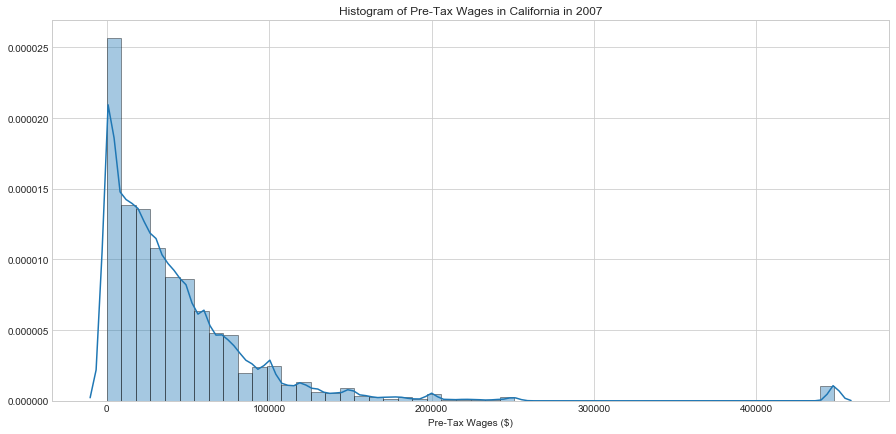

In [42]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2007['Pre-Tax Wages'], label = 'Wages in 2007')
plt.title('Histogram of Pre-Tax Wages in California in 2007')
plt.xlabel('Pre-Tax Wages ($)');

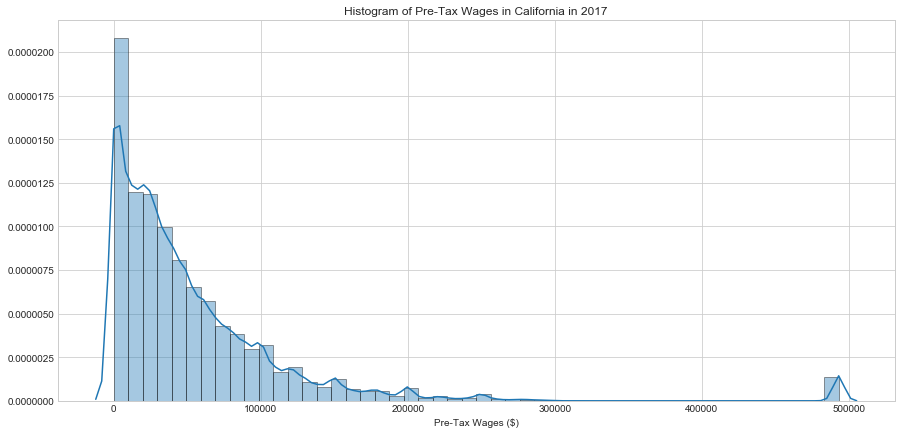

In [41]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2017['Pre-Tax Wages'], label = 'Wages in 2017')
plt.title('Histogram of Pre-Tax Wages in California in 2017')
plt.xlabel('Pre-Tax Wages ($)');

**3A.1.2 Task: Compare these two histograms. Is there a significant difference in distribution of wages between 2007 and 2017?**

[Double click on this cell and write your answer here]

Now that we have gotten a taste for analyzing data and interpreting graphs, let's move on to looking at industries and occupations of workers. 

### 2. Top Industries & Occupations in 2007 vs. 2017

What were the top 10 industries that survey respondents worked in between 2007 and 2017? 

**Run the cell below. Adjust the slider to select the **

In [9]:
(industry_2007['Industry'].value_counts(normalize = True) * 100)[0:10]

Transportation, Warehouse         11.834490
Health Care                       10.863179
Retail Trade                      10.753172
Manufacturing                     10.230639
Educational Services               9.164323
Company Management                 7.976124
Accomodation and Food Services     6.149759
Other services                     4.885930
Finance and Insurance              4.724670
Public Administration              4.500906
Name: Industry, dtype: float64

In [23]:
(industry_2017['Industry'].value_counts(normalize = True) * 100)[0:10]

Health Care                       12.395072
Transportation, Warehouse         10.925615
Retail Trade                       9.993062
Company Management                 9.558038
Educational Services               9.356151
Manufacturing                      9.324274
Accomodation and Food Services     7.011019
Other services                     5.086536
Public Administration              4.454626
Waste Management                   4.378996
Name: Industry, dtype: float64

**3A.2.1 Task: How have the top 10 industries of workers between 2007 and 2017 changed?**

[Double click on this cell and write your answer here]

## B) Income Distribution

For this category, we will look at distributions of income with respect to other variables. First, we will simply compare the distribution of incomes for survey respondents. 

**Run the cells below.**

### 1. Distributions of Income

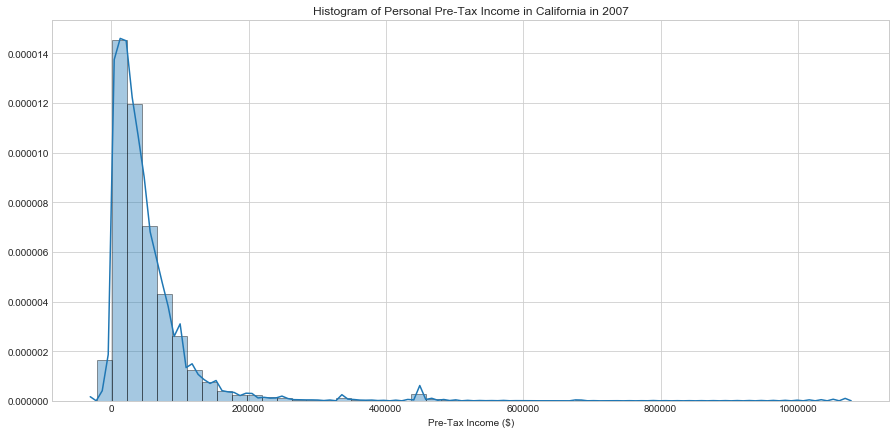

In [34]:
plt.figure(figsize = (15, 7))
sns.distplot(poverty_2007['Personal Pre-Tax Income'], label = 'Wages in 2007')
plt.title('Histogram of Personal Pre-Tax Income in California in 2007')
plt.xlabel('Pre-Tax Income ($)');

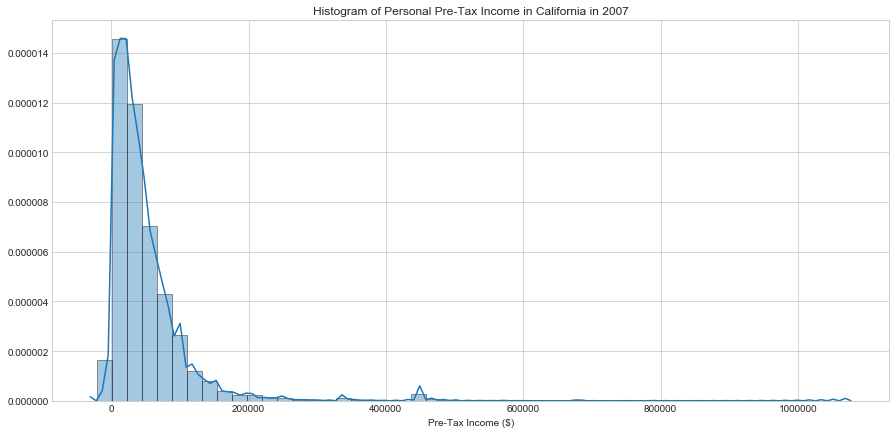

In [35]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2007['Personal Pre-Tax Income'], label = 'Wages in 2007')
plt.title('Histogram of Personal Pre-Tax Income in California in 2007')
plt.xlabel('Pre-Tax Income ($)');

**3B.1.1 Task: Analyze the shapes of these histograms. How are they similar/different? Compare them with their respective histogram for wages, which we generated earlier. Are there any differences? Why might these differences arise?**

[Double click on this cell and write your answer here]

### 2. Statistics 

Over the past decade, the issue of income inequality has increasingly manifested, across the United States. Let's see if our dataset can provide evidence for this claim. 

Specifically, let's test if the gap between bottom and top percentile incomes have increased or decreased over a span of a decade. 

**Run the cell below. **

In [36]:
first_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 1)
tenth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 10)
twenty_fifth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 25)
seventy_fifth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 75)
ninety_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 90)
ninety_ninth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 99)
diff_1 = np.round(seventy_fifth_2007 - twenty_fifth_2007, 2)
diff_2 = np.round(ninety_2007 - tenth_2007, 2)
diff_3 = np.round(ninety_ninth_2007 - first_2007, 2)
print("The gap between the 75th and 25th percentile income is: {}".format(diff_1))
print("The gap between the 10th and 90th percentile income is: {}".format(diff_2))
print("The gap between the 1st and 99th percentile income is: {}".format(diff_3))

The gap between the 75th and 25th percentile income is: 48800.0
The gap between the 10th and 90th percentile income is: 96000.0
The gap between the 1st and 99th percentile income is: 437601.0


In [37]:
first_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 1)
tenth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 10)
twenty_fifth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 25)
seventy_fifth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 75)
ninety_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 90)
ninety_ninth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 99)
diff_1 = np.round(seventy_fifth_2017 - twenty_fifth_2017, 2)
diff_2 = np.round(ninety_2017 - tenth_2017, 2)
diff_3 = np.round(ninety_ninth_2017 - first_2017, 2)
print("The gap between the 75th and 25th percentile income is: {}".format(diff_1))
print("The gap between the 10th and 90th percentile income is: {}".format(diff_2))
print("The gap between the 1st and 99th percentile income is: {}".format(diff_3))

The gap between the 75th and 25th percentile income is: 59000.0
The gap between the 10th and 90th percentile income is: 122000.0
The gap between the 1st and 99th percentile income is: 492400.0


**Compare these statistics. Can we say that there has been a definite increase in income inequality from 2007 to 2017? Why might these numbers be misleading?**

[Double click on this cell and write your answer here]


### 3. Income by City

In [39]:
income_by_city = poverty_2007.groupby('City').mean()[['Personal Pre-Tax Income']].sort_values('Personal Pre-Tax Income')
income_by_city

,Personal Pre-Tax Income
City,
"East Los Angeles, CA",26866.930456
"El Monte, CA",27217.303103
"Santa Ana, CA",30245.612645
"Norwalk, CA",31825.310345
"Pomona, CA",32019.225694
"San Bernardino, CA",33204.606335
"Ontario, CA",33451.720395
"Inglewood, CA",34733.271357
"Oxnard, CA",35242.936556


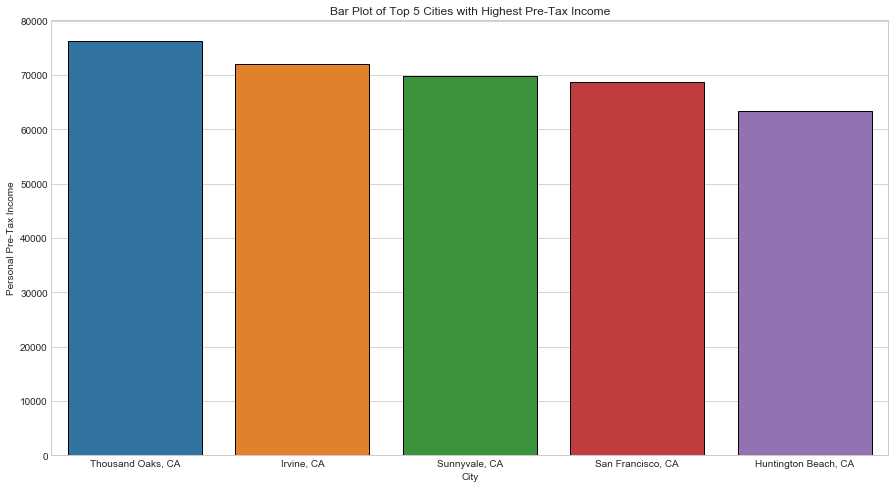

In [53]:
plt.figure(figsize = (15, 8))
top_5_income_by_city = income_by_city.sort_values('Personal Pre-Tax Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = top_5_income_by_city)
plt.title('Bar Plot of Top 5 Cities with Highest Pre-Tax Income');

**Do some research into these cities. How may they be related and why might that explain their presence in the highest average incomes in California?**

[Double click on this cell and write your answer here]


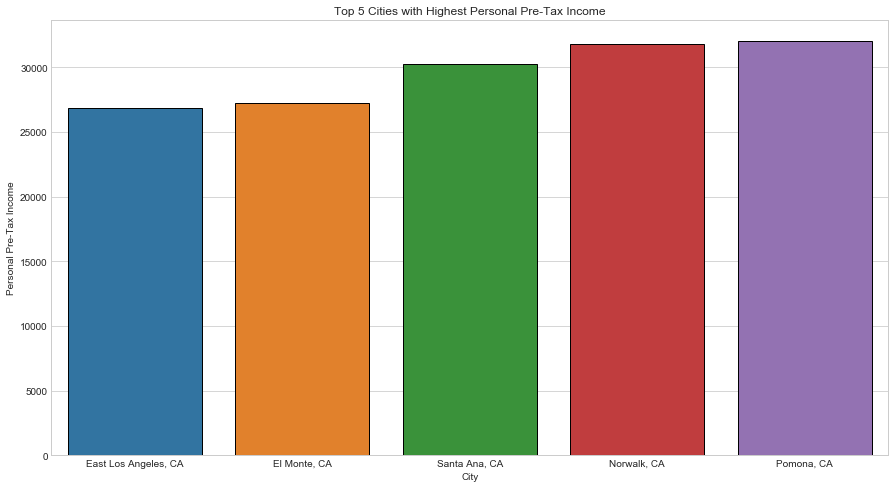

In [54]:
plt.figure(figsize = (15, 8))
bottom_5_income_by_city = income_by_city.sort_values('Personal Pre-Tax Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = bottom_5_income_by_city)
plt.title('Top 5 Cities with Highest Personal Pre-Tax Income');

**Do some research into these cities. How may they be related and why might that explain their presence in the lowest average incomes in California?**

[Double click on this cell and write your answer here]


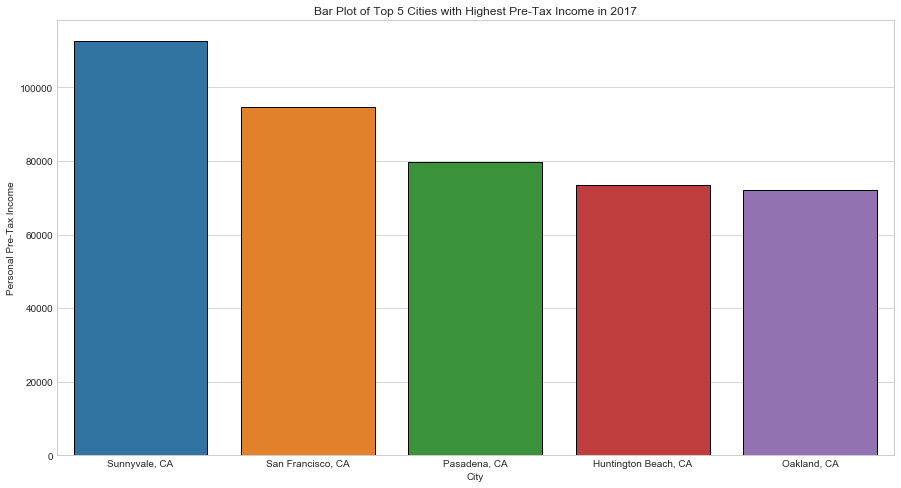

In [58]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Personal Pre-Tax Income']].sort_values('Personal Pre-Tax Income')
top_5_income_by_city_2017 = income_by_city_2017.sort_values('Personal Pre-Tax Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = top_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Highest Pre-Tax Income in 2017');

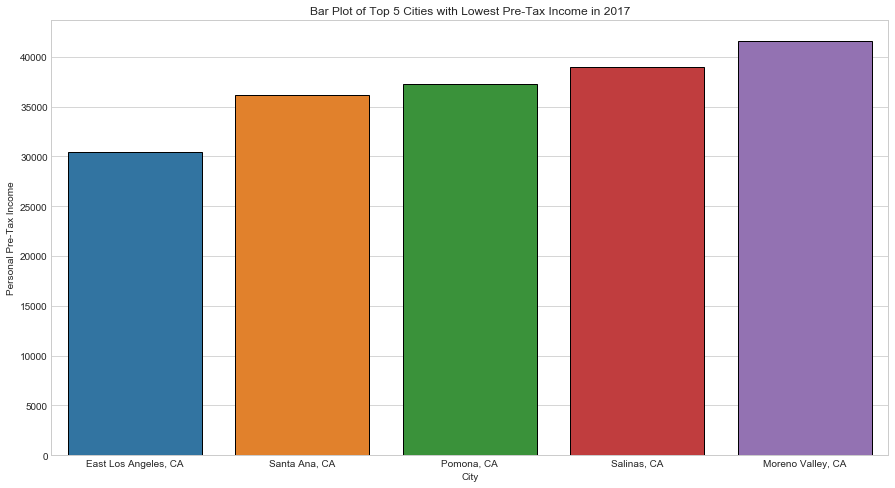

In [59]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Personal Pre-Tax Income']].sort_values('Personal Pre-Tax Income')
bottom_5_income_by_city_2017 = income_by_city_2017.sort_values('Personal Pre-Tax Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = bottom_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Lowest Pre-Tax Income in 2017');

### 4. Income by Type of Worker 

In [63]:
tow_inc_2007 = poverty_2007.groupby('Type of Worker').mean()[['Personal Pre-Tax Income']]
tow_inc_2007

,Personal Pre-Tax Income
Type of Worker,
Self-employed,71069.465883
Works for wages,48653.903814


In [64]:
tow_inc_2017 = poverty_2017.groupby('Type of Worker').mean()[['Personal Pre-Tax Income']]
tow_inc_2017

,Personal Pre-Tax Income
Type of Worker,
Self-employed,74207.358162
Works for wages,61249.418921


### 5. Income by Ownership Status

In [66]:
own_inc_2007 = poverty_2007.groupby('Ownership Status').mean()[['Personal Pre-Tax Income']]
own_inc_2007

,Personal Pre-Tax Income
Ownership Status,
Owned or being bought (loan),60044.236154
Rented,35233.887965


In [68]:
own_inc_2017 = poverty_2017.groupby('Ownership Status').mean()[['Personal Pre-Tax Income']]
own_inc_2017

,Personal Pre-Tax Income
Ownership Status,
Owned or being bought (loan),74237.355526
Rented,45512.805127


In [73]:
own_inc_2007 = poverty_2007.groupby(['Ownership Status', 'City']).mean()[['Personal Pre-Tax Income']]
own_inc_2007

Personal Pre-Tax Income
Ownership Status             City                                                             
Owned or being bought (loan) Anaheim, CA                                          52404.806522
                             Bakersfield, CA                                      47214.492553
                             Burbank, CA                                          54982.591549
                             Chula Vista, CA                                      50499.746667
                             Corona, CA                                           54511.200361
                             Costa Mesa, CA                                       57185.922535
                             Downey, CA                                           50777.866359
                             East Los Angeles, CA                                 34494.235294
                             El Monte, CA                                         31644.814815
                             Fontana, CA                                          38638.169884
                             Fresno, CA                                           43288.422399
                             Fullerton, CA                                        61387.991957
                             Garden Grove, CA                                     43636.528169
                             Glendale, CA                                         70809.713068
                             Huntington Beach, CA                                 71852.437337
                             Inglewood, CA                                        41903.357143
                             Irvine, CA                                           84453.133013
                             Lancaster, CA                                        47197.389503
                             Long Beach, CA                                       59638.727554
                             Los Angeles, CA                                      65581.982653
                             Modesto, CA                                          48867.444444
                             Moreno Valley, CA                                    38863.046679
                             Norwalk, CA                                          33164.417910
                             Not in identifiable city (or size group)             60902.439741
                             Oakland, CA                                          74496.445918
                             Ontario, CA                                          35773.446078
                             Orange, CA                                           67975.970954
                             Oxnard, CA                                           39744.535797
                             Palmdale, CA                                         45450.562667
                             Pasadena, CA                                         80024.095506
...                                                                                        ...
Rented                       Irvine, CA                                           51283.264000
                             Lancaster, CA                                        30404.233129
                             Long Beach, CA                                       29183.784878
                             Los Angeles, CA                                      32052.982804
                             Modesto, CA                                          27723.542986
                             Moreno Valley, CA                                    24994.695122
                             Norwalk, CA                                          27339.300000
                             Not in identifiable city (or size group)             35796.892803
                             Oakland, CA                                          38562.781843
                             Ontario, CA                                         

In [74]:
own_inc_2017 = poverty_2017.groupby(['Ownership Status', 'City']).mean()[['Personal Pre-Tax Income']]
own_inc_2017

Personal Pre-Tax Income
Ownership Status             City                                                             
Owned or being bought (loan) Antioch, CA                                          54393.255814
                             Downey, CA                                           62622.563025
                             East Los Angeles, CA                                 36348.074866
                             Elk Grove, CA                                        65293.436853
                             Glendale, CA                                         83969.771987
                             Huntington Beach, CA                                 86214.152249
                             Inglewood, CA                                        51310.105263
                             Long Beach, CA                                       68126.365442
                             Los Angeles, CA                                      76368.469466
                             Moreno Valley, CA                                    46875.282651
                             Not in identifiable city (or size group)             73992.253532
                             Oakland, CA                                          94657.629151
                             Ontario, CA                                          49070.765550
                             Palmdale, CA                                         51602.248244
                             Pasadena, CA                                        105921.229050
                             Pomona, CA                                           44137.109974
                             Rancho Cucamonga, CA                                 58783.742455
                             Roseville, CA                                        76182.494279
                             Salinas, CA                                          47579.129213
                             San Francisco, CA                                   108896.925734
                             Santa Ana, CA                                        41524.915254
                             Sunnyvale, CA                                       132590.297297
                             Visalia, CA                                          60329.774436
Rented                       Antioch, CA                                          41091.632653
                             Downey, CA                                           35301.767956
                             East Los Angeles, CA                                 26532.170819
                             Elk Grove, CA                                        41227.923077
                             Glendale, CA                                         46979.910314
                             Huntington Beach, CA                                 52194.017341
                             Inglewood, CA                                        34789.709544
                             Long Beach, CA                                       36634.863636
                             Los Angeles, CA                                      42003.549304
                             Moreno Valley, CA                                    30760.478088
                             Not in identifiable city (or size group)             44536.753718
                             Oakland, CA                                          52449.133921
                             Ontario, CA                                          32622.914980
                             Palmdale, CA                                         34120.885417
                             Pasadena, CA                                         53747.307692
                             Pomona, CA                                           25823.433476
                             Rancho Cucamonga, CA                                 43150.348259
                             Roseville, CA                                       

### 6. Income by Race

In [85]:
race_inc_2007 = poverty_2007.groupby('Race').mean()[['Personal Pre-Tax Income']]
race_inc_2007

,Personal Pre-Tax Income
Race,
African American,42253.078032
American Indian or Alaska Native,38693.112462
Asian/Pacific Islander,53093.695701
Other,29607.611318
Two or more races,40089.936180
White,57140.808708


In [84]:
race_inc_2017 = poverty_2017.groupby('Race').mean()[['Personal Pre-Tax Income']]
race_inc_2017

,Personal Pre-Tax Income
Race,
African American,50433.852112
American Indian or Alaska Native,41311.756168
Asian/Pacific Islander,69363.302402
Other,34215.242148
Two or more races,53662.714804
White,68593.558074


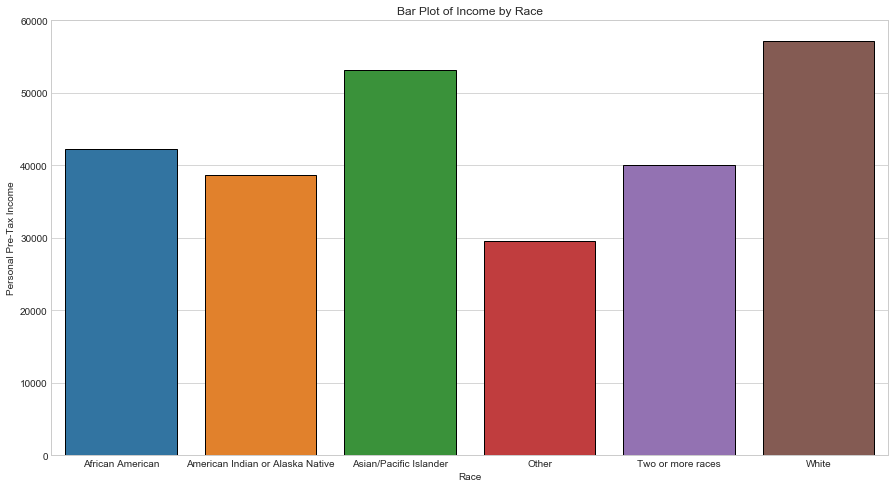

In [87]:
plt.figure(figsize = (15, 8))
race_income_2007 = race_inc_2007.reset_index()
sns.barplot(x = 'Race', y = 'Personal Pre-Tax Income', data = race_income_2007)
plt.title('Bar Plot of Income by Race');

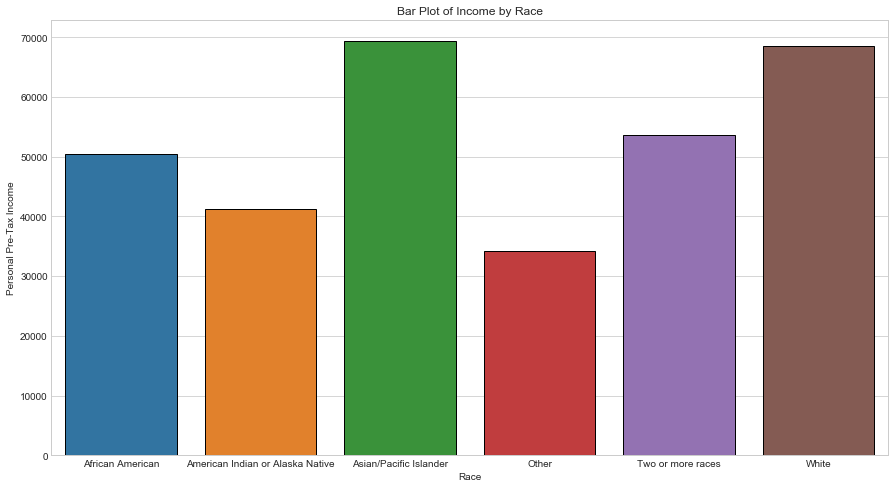

In [88]:
plt.figure(figsize = (15, 8))
race_income_2017 = race_inc_2017.reset_index()
sns.barplot(x = 'Race', y = 'Personal Pre-Tax Income', data = race_income_2017)
plt.title('Bar Plot of Income by Race');

## C) Education level 

**Insert code and analysis, as well as short answer questions.**

## D) Indicators of poverty

**Insert code and analysis, as well as short answer questions.**

## E) Employment

### 1. Total Employment Statistics by Year

In [107]:
employment_07 =emp_sector_2007.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
employment_07

,Personal Pre-Tax Income
Employment Status,
Employed,55187.306045
Not in labor force,27299.733291
Unemployed,22349.844229


In [108]:
employment_17 = emp_sector_2017.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
employment_17

,Personal Pre-Tax Income
Employment Status,
Employed,65696.244687
Not in labor force,32112.935507
Unemployed,27047.457650


In [109]:
change_in_wages_employed = employment_17['Personal Pre-Tax Income'][0] - employment_07['Personal Pre-Tax Income'][0]
change_in_wages_employed

10508.938642390356

### 2. Work Status and Foodstamp Recipient

In [110]:
employment_07 =emp_sector_2007.groupby(['Employment Status', 'Foodstamp Recipient']).count()[['Personal Pre-Tax Income']].rename(columns = {'Personal Pre-Tax Income':'Count'})
employment_17 = emp_sector_2017.groupby(['Employment Status', 'Foodstamp Recipient']).count()[['Personal Pre-Tax Income']].rename(columns = {'Personal Pre-Tax Income':'Count'})
display(employment_07, employment_17)

Count
Employment Status  Foodstamp Recipient        
Employed           No                   137054
                   Yes                    3994
Not in labor force No                    11901
                   Yes                     652
Unemployed         No                     5747
                   Yes                     647

Count
Employment Status  Foodstamp Recipient        
Employed           No                   136006
                   Yes                   11137
Not in labor force No                     7431
                   Yes                     911
Unemployed         No                     3665
                   Yes                     845

### 3. Employment Sector vs. Personal Income

In [111]:
employment_income07 =emp_sector_2007.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
employment_income17 = emp_sector_2017.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
display(employment_income07, employment_income17)

,Personal Pre-Tax Income
Employment Status,
Employed,55187.306045
Not in labor force,27299.733291
Unemployed,22349.844229


,Personal Pre-Tax Income
Employment Status,
Employed,65696.244687
Not in labor force,32112.935507
Unemployed,27047.457650


## Bibliography <a id = 'section7'></a>

• https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html

• https://en.wikipedia.org/wiki/Stratified_sampling

• (TBD)

• (TBD)

___
### Sidenotes:
[1]: Since the size of the original dataset was too large, we are using Stratified Random Samples instead. Refer to the link in the bibliography for more information on our sampling approach. 

___
### Getting extra help

Interested in getting help with learning Python or applying computational analysis? Check out  [Data Peer Consulting](https://data.berkeley.edu/education/data-peer-consulting) in Moffitt library for drop-in, one-on-one questions. For additional workshops designed for people new to computational analysis, take a look at the workshops at [The Dlab](https://dlab.berkeley.edu) (free for Berkeley students!). 

Best  luck!

------------------------------------------------------------------------------------------------------------------------

### Feedback:
Please let us know your thoughts on this notebook!

Fill out the survey at this link: https://docs.google.com/forms/d/e/1FAIpQLSfahkYSKqlEEfC6WMKlaqeIxRVj0r7T4N5lgBf9bRVwRG58wQ/viewform

------------------------------------------------------------------------------------------------------------------------
Notebook developed by: Ritvik Iyer, Carlos Calderon

Data Science Modules: http://data.berkeley.edu/education/modules